### BANK LOAN CASE STUDY

### PROJECT DESCRIPTION
#### As a data analyst at a finance company, I am facing a significant challenge: some customers without sufficient credit history are more likely to default on their loans. So, I have used EDA to identify patterns in the data to ensure capable applicants are not rejected while minimizing financial loss from defaults.
### The primary aim of this project is to identify patterns that indicate whether a customer will have difficulty paying their installments. This information can be used to:
#### •	Deny loans to high-risk applicants.
#### •	Reduce the loan amount for high-risk applicants.
#### •	Offer loans at higher interest rates to risky applicants.
####  Ultimately, the goal is to understand the key factors behind loan default to make better decisions about loan approvals.


### PROJECT APPROACH
#### •	Understand Data: Review dataset structure, types of variables, and basic statistics.
#### •	Handle Missing Data: Identify missing values using Excel functions and apply imputation or removal techniques.
#### •	Identify Outliers: Detect outliers with statistical methods and decide on appropriate handling.
#### •	Analyze Data Imbalance: Assess class distribution in the target variable and address imbalance if needed.
#### •	Univariate Analysis: Examine individual variable distributions with visualizations.
#### •	Segmented Univariate Analysis: Compare variable distributions across different customer scenarios.
#### •	Bivariate Analysis: Explore relationships between two variables visualizations.
#### •	Identify Top Correlations: Identified the correlation between  defaulters      


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


###  To read the csv file

In [63]:
df = pd.read_csv('project.csv')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12068\3363276977.py:1: DtypeWarning: Columns (76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('project.csv')


In [64]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,157871,0,Cash loans,F,N,N,0,180000.0,1206000.0,45936.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49995,157872,0,Cash loans,M,N,N,0,126000.0,1125000.0,47794.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49996,157873,0,Cash loans,M,N,N,1,112500.0,900000.0,26316.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
49997,157874,0,Cash loans,F,N,Y,0,270000.0,820638.0,34897.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,4.0


### Converting all the negative values into positive values

In [65]:
numeric_abs = df.select_dtypes(include='number').abs()
df[numeric_abs.columns] = numeric_abs


###  Converting 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' days columns into years


In [66]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365,2))
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365,2))
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365,2))
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365,2))

#### Replacing the column names into a valid name

In [67]:
df.rename(columns={
    'DAYS_BIRTH': 'AGE',
    'DAYS_EMPLOYED': 'YEARS_OF_EMPLOYMENT',
    'DAYS_REGISTRATION': 'YEARS_OF_REGISTRATION',
    'DAYS_ID_PUBLISH': 'YEARS_OF_ID_PUBLISH'
}, inplace=True)


### To find the number of null values

In [68]:
print(df.isnull().sum())
print(df.shape)


SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6734
AMT_REQ_CREDIT_BUREAU_WEEK    6734
AMT_REQ_CREDIT_BUREAU_MON     6734
AMT_REQ_CREDIT_BUREAU_QRT     6734
AMT_REQ_CREDIT_BUREAU_YEAR    6734
Length: 122, dtype: int64
(49999, 122)


##### In my dataset, I found that there are lot of missing data. So, I handled the missing data effectively to ensure the accuracy of analysis by the following steps.
##### •The percentage of null values has been analyzed and those columns with more than 40% of the null data have to be dropped.
##### •Those columns with less than 40% of the null data have to be replaced with mean or median or mode imputation for categorical variables.


##### Calculation to find forty percent

In [69]:
forty_per = 49999 * (40/100)
forty_per

19999.600000000002

##### Finding the columns that we are going to drop 

In [70]:
missing_values = df.isnull().sum() 
missing_more_than_forty = missing_values[df.isnull().sum()  > forty_per]
print(missing_more_than_forty)
print(missing_more_than_forty.shape)

OWN_CAR_AGE                     32950
EXT_SOURCE_1                    28172
APARTMENTS_AVG                  25385
BASEMENTAREA_AVG                29199
YEARS_BEGINEXPLUATATION_AVG     24394
YEARS_BUILD_AVG                 33239
COMMONAREA_AVG                  34960
ELEVATORS_AVG                   26651
ENTRANCES_AVG                   25195
FLOORSMAX_AVG                   24875
FLOORSMIN_AVG                   33894
LANDAREA_AVG                    29721
LIVINGAPARTMENTS_AVG            34226
LIVINGAREA_AVG                  25137
NONLIVINGAPARTMENTS_AVG         34714
NONLIVINGAREA_AVG               27572
APARTMENTS_MODE                 25385
BASEMENTAREA_MODE               29199
YEARS_BEGINEXPLUATATION_MODE    24394
YEARS_BUILD_MODE                33239
COMMONAREA_MODE                 34960
ELEVATORS_MODE                  26651
ENTRANCES_MODE                  25195
FLOORSMAX_MODE                  24875
FLOORSMIN_MODE                  33894
LANDAREA_MODE                   29721
LIVINGAPARTM

##### There are 49 column with more than 40% null values

##### Dropped the columns that have null values more than 40% and placed it in a Data Frame

In [71]:
df_after_dropping_null_values_more_than_forty_percent = df.drop(columns=missing_more_than_forty.index)
df_after_dropping_null_values_more_than_forty_percent.shape

(49999, 73)

##### After droping we have 73 columns

In [72]:
print(df_after_dropping_null_values_more_than_forty_percent.isnull().sum().to_string())

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        1
AMT_GOODS_PRICE                   38
NAME_TYPE_SUITE                  192
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
AGE                                0
YEARS_OF_EMPLOYMENT                0
YEARS_OF_REGISTRATION              0
YEARS_OF_ID_PUBLISH                0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

##### There are still some columns that have null values

### Handling null values for a categorical variable

#### Imputing the missing value with 'MODE' for 'NAME_TYPE_SUIT_COLUMN'

In [73]:
df_after_dropping_null_values_more_than_forty_percent['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      40435
Family              6549
Spouse, partner     1849
Children             542
Other_B              259
Other_A              137
Group of people       36
Name: count, dtype: int64

#####  'Unnaccompanied' has the highest frequency. So replacing the mising values with 'Unnacompanied'

In [74]:
df_cleaned =  df_after_dropping_null_values_more_than_forty_percent.copy()
df_cleaned['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12068\720284925.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)


In [75]:
df_cleaned['NAME_TYPE_SUITE'].isnull().sum()

0

##### 'OCCUPATION_TYPE' categorical variable has 15654 null values which is a huge number so replacing the null values with 'UNKNOWN'

In [76]:
df_cleaned['OCCUPATION_TYPE'].isnull().sum()


15654

In [77]:
df_cleaned['OCCUPATION_TYPE'].fillna('UNKNOWN', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12068\3962692064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['OCCUPATION_TYPE'].fillna('UNKNOWN', inplace=True)


In [78]:
df_cleaned['OCCUPATION_TYPE'].isnull().sum()

0

#### Handling numerical varibles

##### Calculating the skew

In [79]:
numeric_null_col = df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0]

df_cleaned[numeric_null_col.index].skew()

AMT_ANNUITY                    1.688526
AMT_GOODS_PRICE                1.347816
CNT_FAM_MEMBERS                0.949618
EXT_SOURCE_2                  -0.793424
EXT_SOURCE_3                  -0.411055
OBS_30_CNT_SOCIAL_CIRCLE       2.525750
DEF_30_CNT_SOCIAL_CIRCLE       3.865177
OBS_60_CNT_SOCIAL_CIRCLE       2.530120
DEF_60_CNT_SOCIAL_CIRCLE       4.460229
DAYS_LAST_PHONE_CHANGE         0.710922
AMT_REQ_CREDIT_BUREAU_HOUR    13.562860
AMT_REQ_CREDIT_BUREAU_DAY     22.273860
AMT_REQ_CREDIT_BUREAU_WEEK     7.927587
AMT_REQ_CREDIT_BUREAU_MON      7.973674
AMT_REQ_CREDIT_BUREAU_QRT      2.702971
AMT_REQ_CREDIT_BUREAU_YEAR     1.296282
dtype: float64

##### There are some negative and positive skew present in the data. So decided to median imputation

In [80]:
m=df_cleaned[numeric_null_col.index].median().round()
m


AMT_ANNUITY                    24939.0
AMT_GOODS_PRICE               450000.0
CNT_FAM_MEMBERS                    2.0
EXT_SOURCE_2                       1.0
EXT_SOURCE_3                       1.0
OBS_30_CNT_SOCIAL_CIRCLE           0.0
DEF_30_CNT_SOCIAL_CIRCLE           0.0
OBS_60_CNT_SOCIAL_CIRCLE           0.0
DEF_60_CNT_SOCIAL_CIRCLE           0.0
DAYS_LAST_PHONE_CHANGE           755.0
AMT_REQ_CREDIT_BUREAU_HOUR         0.0
AMT_REQ_CREDIT_BUREAU_DAY          0.0
AMT_REQ_CREDIT_BUREAU_WEEK         0.0
AMT_REQ_CREDIT_BUREAU_MON          0.0
AMT_REQ_CREDIT_BUREAU_QRT          0.0
AMT_REQ_CREDIT_BUREAU_YEAR         1.0
dtype: float64

In [81]:
df_cleaned[numeric_null_col.index] = df_cleaned[numeric_null_col.index].fillna(m)

### Data Frame after cleaning the data

In [82]:
print(df_cleaned.isnull().sum().to_string())

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
AGE                            0
YEARS_OF_EMPLOYMENT            0
YEARS_OF_REGISTRATION          0
YEARS_OF_ID_PUBLISH            0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [83]:
df_cleaned.shape

(49999, 73)

##### There are 73 columns and 49999 rows

In [84]:
df_cleaned

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,157871,0,Cash loans,F,N,N,0,180000.0,1206000.0,45936.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49995,157872,0,Cash loans,M,N,N,0,126000.0,1125000.0,47794.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49996,157873,0,Cash loans,M,N,N,1,112500.0,900000.0,26316.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
49997,157874,0,Cash loans,F,N,Y,0,270000.0,820638.0,34897.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,4.0


### outliers

##### Dropping the rows that have outliers

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12068\3969572945.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


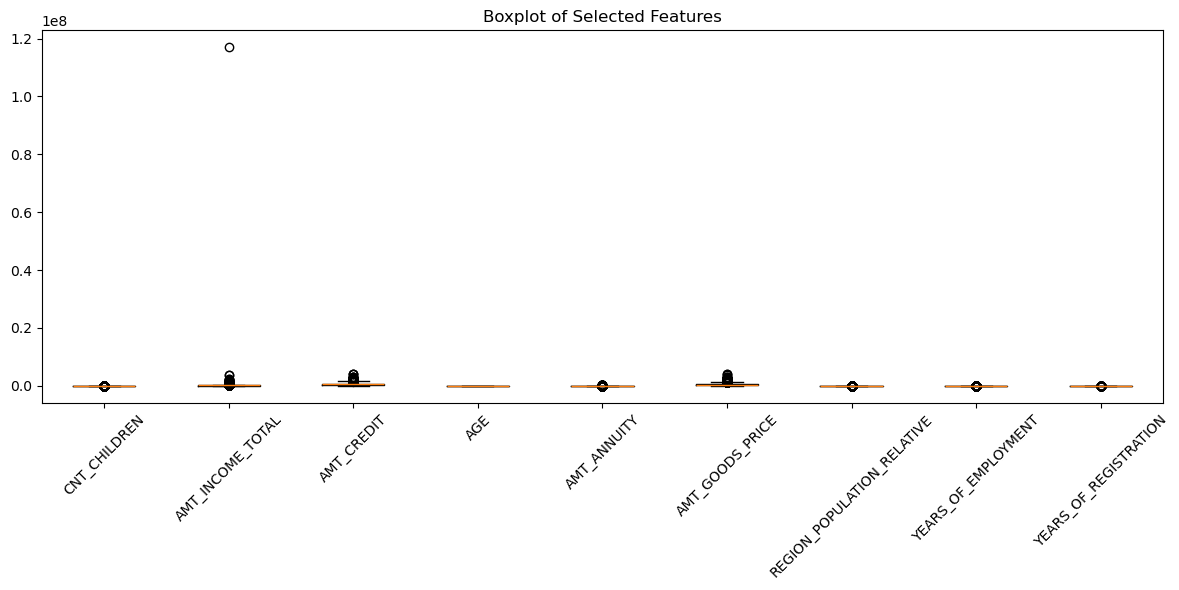

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.boxplot([
    df_cleaned['CNT_CHILDREN'],
    df_cleaned['AMT_INCOME_TOTAL'],
    df_cleaned['AMT_CREDIT'],
    df_cleaned['AGE'],
    df_cleaned['AMT_ANNUITY'],
    df_cleaned['AMT_GOODS_PRICE'],
    df_cleaned['REGION_POPULATION_RELATIVE'],
    df_cleaned['YEARS_OF_EMPLOYMENT'],
    df_cleaned['YEARS_OF_REGISTRATION']
], 
labels=[
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AGE',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'REGION_POPULATION_RELATIVE',
    'YEARS_OF_EMPLOYMENT',
    'YEARS_OF_REGISTRATION'
])

plt.title("Boxplot of Selected Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [86]:
df_cleaned_no_outlier = df_cleaned.copy()

In [87]:
col = [
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AGE',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'REGION_POPULATION_RELATIVE',
    'YEARS_OF_EMPLOYMENT',
    'YEARS_OF_REGISTRATION'
]

In [88]:

for i in col:
    q1 = df_cleaned_no_outlier[i].quantile(0.25)
    q3 = df_cleaned_no_outlier[i].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
   
    df_cleaned_no_outlier  =df_cleaned_no_outlier[(df_cleaned_no_outlier[i]<=ub) & (df_cleaned_no_outlier[i]>=lb)]
   

In [89]:
df_cleaned_no_outlier

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,157868,0,Cash loans,F,Y,Y,0,135000.0,1078200.0,31653.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49994,157871,0,Cash loans,F,N,N,0,180000.0,1206000.0,45936.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49995,157872,0,Cash loans,M,N,N,0,126000.0,1125000.0,47794.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49996,157873,0,Cash loans,M,N,N,1,112500.0,900000.0,26316.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


### EDA
### 0 -> Defaulters
### 1 -> Non-Defaulters

In [90]:
imbalance_data =round((df_cleaned_no_outlier['TARGET'].value_counts()/df_cleaned_no_outlier.shape[0])* 100)
imbalance_data

TARGET
0    91.0
1     9.0
Name: count, dtype: float64

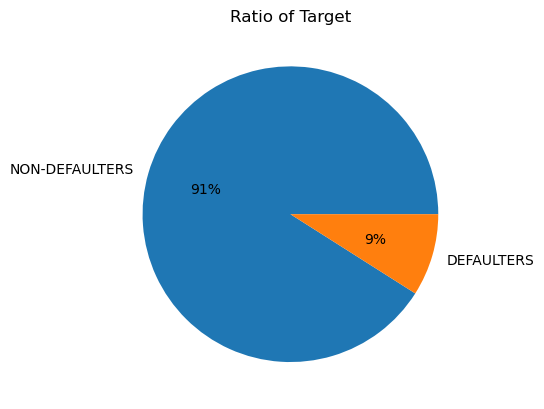

In [91]:
plt.pie(imbalance_data, labels = ['NON-DEFAULTERS','DEFAULTERS'], autopct = '%1.f%%')
plt.title('Ratio of Target')
plt.show()

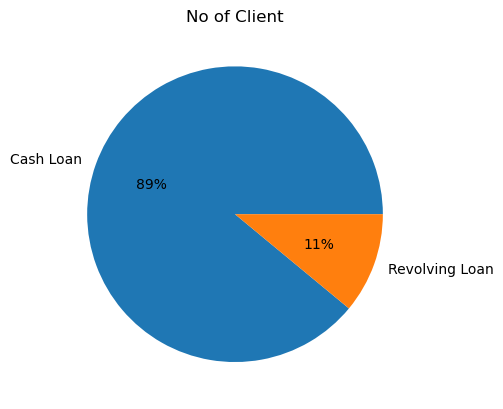

In [92]:
plt.pie(round((df_cleaned_no_outlier['NAME_CONTRACT_TYPE'].value_counts()/df_cleaned_no_outlier.shape[0])* 100), 
        labels = ['Cash Loan', 'Revolving Loan'], autopct = '%1.f%%')
plt.title('No of Client')
plt.show()


##### There is an imbalance in this data

### Univariate Analysis, Univariate Segmented Analysis and Bivariate Analysis

#### 'AMT_INCOME_TOTAL'

#### Income of defaulters who have taken loans 

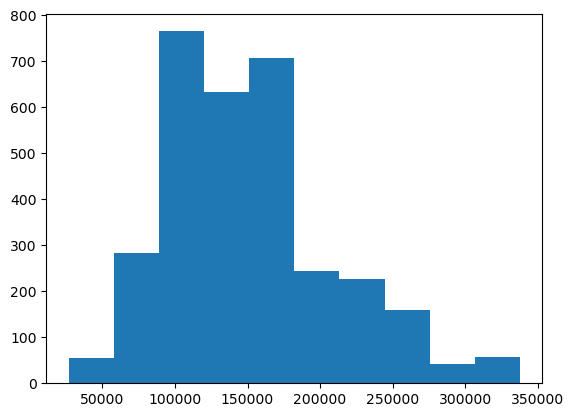

In [143]:
plt.hist(df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET']==1]['AMT_INCOME_TOTAL'])
plt.show()

##### Most of the defaulters have taken loan has an income from 100000 to 150000

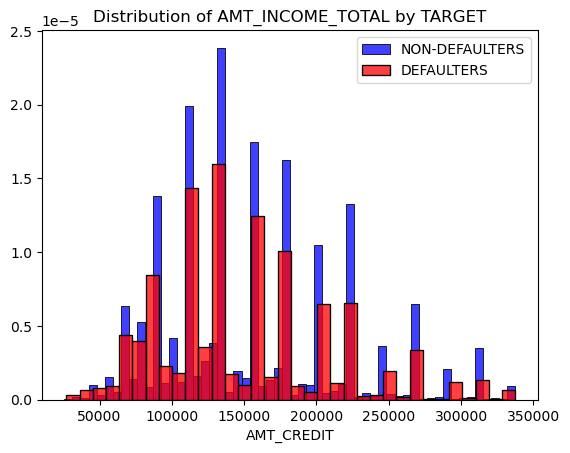

In [160]:
sns.histplot(df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET'] == 0]['AMT_INCOME_TOTAL'],
             stat='density', color='blue', label='NON-DEFAULTERS')

sns.histplot(df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET'] == 1]['AMT_INCOME_TOTAL'],
             stat='density', color='red', label='DEFAULTERS')

plt.legend()
plt.title('Distribution of AMT_INCOME_TOTAL by TARGET')
plt.xlabel('AMT_CREDIT')
plt.ylabel('')
plt.show()

##### As the income increases, the number of people who have taken loan decreases. But higher income does not directly leads to lower default proportion


#### AMT_CREDITED

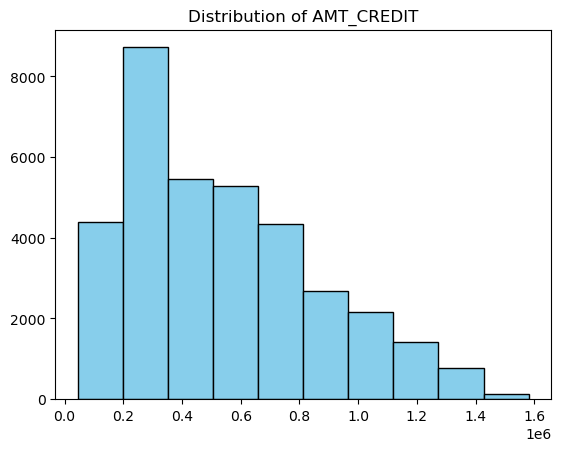

In [95]:

plt.hist(df_cleaned_no_outlier['AMT_CREDIT'],  color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_CREDIT')
plt.show()

##### Only few number of people applied for loan with lagre credit

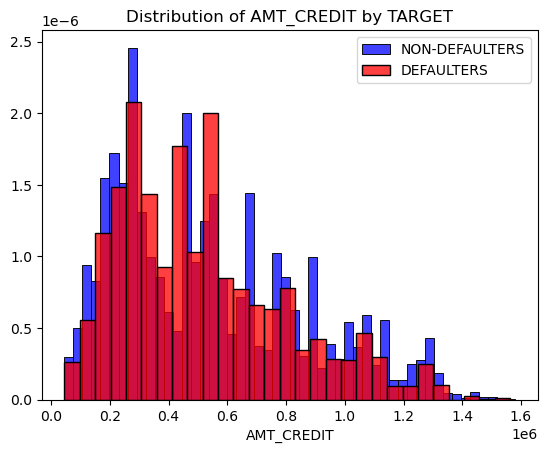

In [156]:
sns.histplot(df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET'] == 0]['AMT_CREDIT'],
             stat='density', color='blue', label='NON-DEFAULTERS')

sns.histplot(df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET'] == 1]['AMT_CREDIT'],
             stat='density', color='red', label='DEFAULTERS')

plt.legend()
plt.title('Distribution of AMT_CREDIT by TARGET')
plt.xlabel('AMT_CREDIT')
plt.ylabel('')
plt.show()


##### While most loans are concentrated around mid-level credit amounts (300k–600k), the proportion of defaulters appears to decline as credit amount increases. This suggests that applicants approved for higher credit amounts are generally more reliable or have stronger profiles, resulting in fewer defaults


#### ANNUITY_AMT

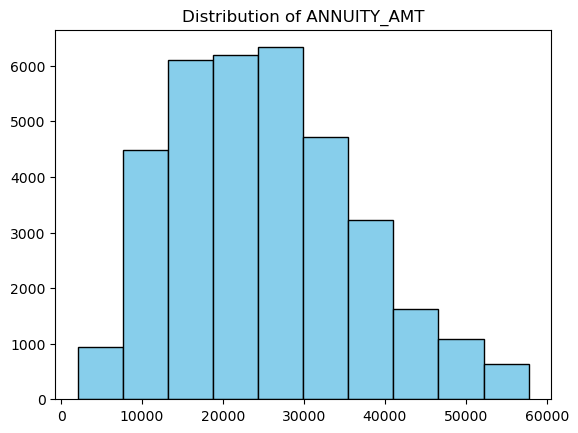

In [97]:
plt.hist(df_cleaned_no_outlier['AMT_ANNUITY'],  color='skyblue', edgecolor='black')
plt.title('Distribution of ANNUITY_AMT')
plt.show()

##### Most of the people have taken loans with annuity amount 15000 to 30000 

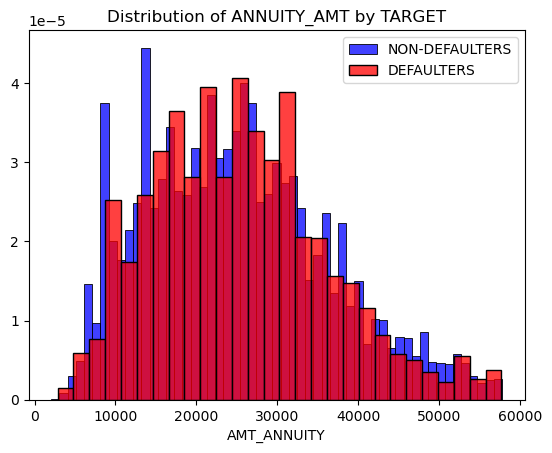

In [98]:
sns.histplot(df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET'] == 0]['AMT_ANNUITY'],
             stat='density', color='blue', label='NON-DEFAULTERS')

sns.histplot(df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET'] == 1]['AMT_ANNUITY'],
             stat='density', color='red', label='DEFAULTERS')

plt.legend()
plt.title('Distribution of ANNUITY_AMT by TARGET')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('')
plt.show()

##### As the annuity amount increases, the number of people who have taken loan rate decreases. There are more defaulters across all ranges

#### AMT_GOODS_PRICE

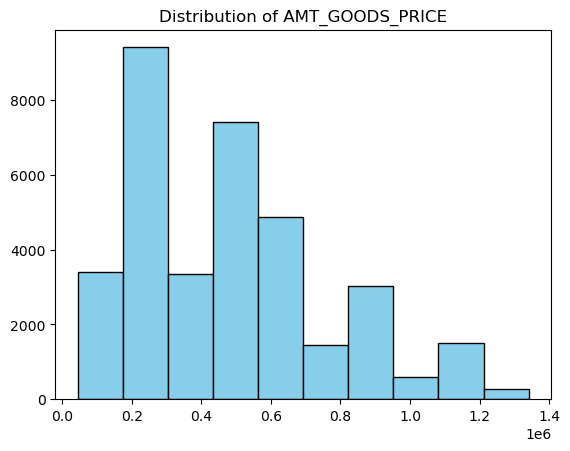

In [99]:
plt.hist(df_cleaned_no_outlier['AMT_GOODS_PRICE'],  color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_GOODS_PRICE')
plt.show()

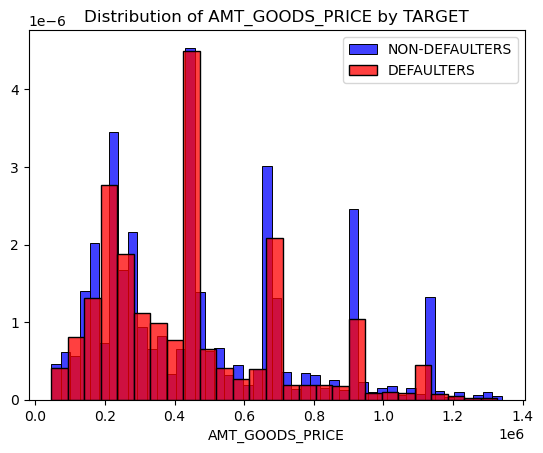

In [100]:
sns.histplot(df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET'] == 0]['AMT_GOODS_PRICE'],
             stat='density', color='blue', label='NON-DEFAULTERS')

sns.histplot(df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET'] == 1]['AMT_GOODS_PRICE'],
             stat='density', color='red', label='DEFAULTERS')

plt.legend()
plt.title('Distribution of AMT_GOODS_PRICE by TARGET')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('')
plt.show()

##### As the goods price, increases, the defaulters rate descreases. Applicants taking loans for higher priced goods tends to default less frequently than those financing lower cost goods

#### code gender

In [101]:
gender = df_cleaned_no_outlier[(df_cleaned_no_outlier['CODE_GENDER']=='F') | (df_cleaned_no_outlier['CODE_GENDER']=='M')]['CODE_GENDER'].value_counts()
gender

CODE_GENDER
F    22348
M    12979
Name: count, dtype: int64

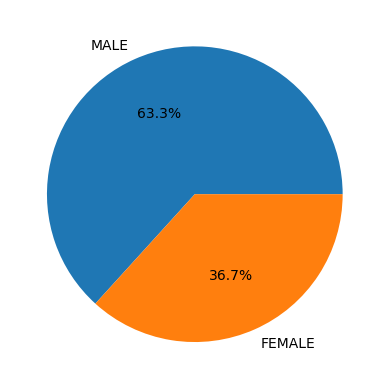

In [102]:
plt.pie(gender, labels = ['MALE','FEMALE'], autopct = '%1.1f%%')
plt.show()

##### 36% of female and 63% of men have taken loans have taken loan

In [103]:
gender_defaulters = df_cleaned_no_outlier[((df_cleaned_no_outlier['CODE_GENDER']=='F') | (df_cleaned_no_outlier['CODE_GENDER']=='M')) &  (df_cleaned_no_outlier['TARGET']==1)]['CODE_GENDER'].value_counts()
gender_defaulters

CODE_GENDER
F    1709
M    1466
Name: count, dtype: int64

In [104]:
gender = df_cleaned_no_outlier[(df_cleaned_no_outlier['CODE_GENDER']=='F') | (df_cleaned_no_outlier['CODE_GENDER']=='M')][['CODE_GENDER','TARGET']].value_counts(normalize=True)
gender

CODE_GENDER  TARGET
F            0         0.584227
M            0         0.325898
F            1         0.048377
M            1         0.041498
Name: proportion, dtype: float64

##### 63% of Men have taken loan out of which 4% are defaulters, 36% of Women  have taken loan out of which also 4% are defaulters. So there are lot of women defaulters


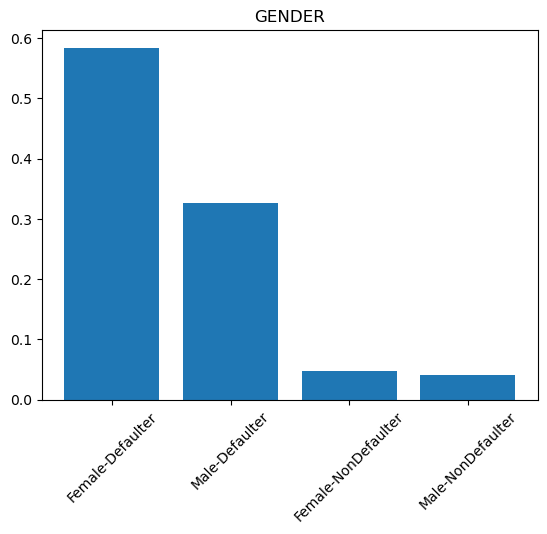

In [105]:
labels = ['Female-Defaulter','Male-Defaulter', 'Female-NonDefaulter','Male-NonDefaulter']
plt.bar(labels,gender)
plt.xticks(rotation = 45)
plt.title('GENDER')
plt.show()

<Axes: xlabel='AGE', ylabel='Count'>

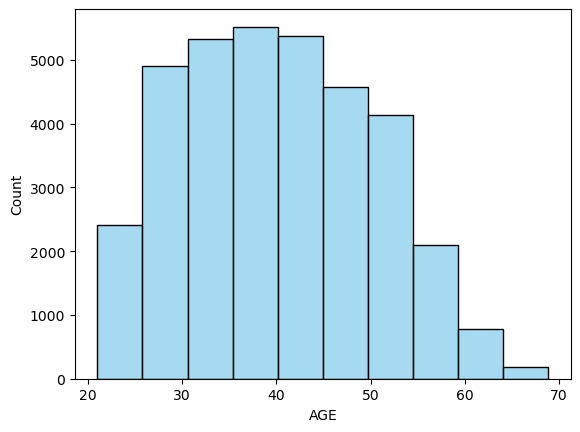

In [106]:

sns.histplot(df_cleaned_no_outlier['AGE'], bins=10, color='skyblue')

##### People between 25 - 55 take loans mostly

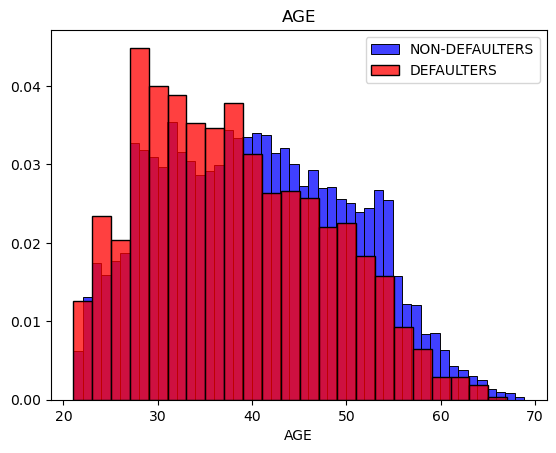

In [107]:
sns.histplot(df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET']==0]['AGE'],
             stat='density', color='blue', label='NON-DEFAULTERS')

sns.histplot(df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET']==1]['AGE'],
             stat='density', color='red', label='DEFAULTERS')
plt.title('AGE')
plt.ylabel('')
plt.legend()
plt.show()

##### People between 25 - 40 are mostly defaulters. As the age increases the defaulters rate descreases

#### CNT_CHILDREN

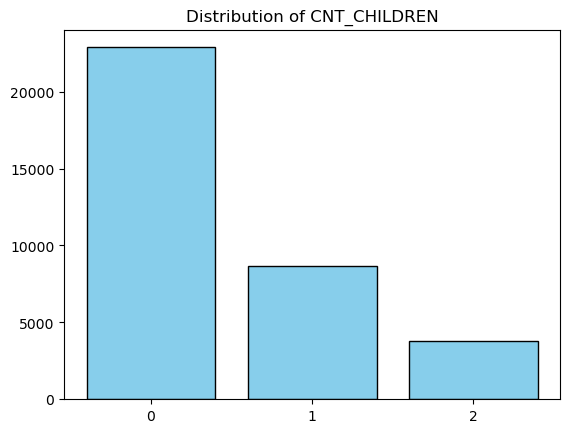

In [108]:
counts = df_cleaned_no_outlier['CNT_CHILDREN'].value_counts().sort_index()

plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of CNT_CHILDREN')
plt.xticks(counts.index)
plt.show()



##### Families with the highest number of children, takes less loan

In [109]:
df_cleaned_no_outlier.groupby('CNT_CHILDREN')['TARGET'].value_counts(normalize=True)


CNT_CHILDREN  TARGET
0             0         0.913087
              1         0.086913
1             0         0.903512
              1         0.096488
2             0         0.907422
              1         0.092578
Name: proportion, dtype: float64

##### Defaulters does not depend upon the count of children

#### CNT_FAM_MEMBERS

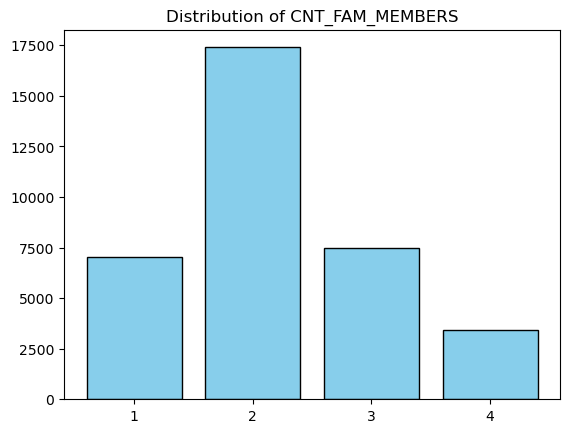

In [110]:
counts = df_cleaned_no_outlier['CNT_FAM_MEMBERS'].value_counts().sort_index()

plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of CNT_FAM_MEMBERS')
plt.xticks(counts.index)
plt.show()

##### Family members with 2 has more number of loans

In [112]:
df_cleaned_no_outlier.groupby('CNT_FAM_MEMBERS')['TARGET'].value_counts(normalize=True)


CNT_FAM_MEMBERS  TARGET
1.0              0         0.902321
                 1         0.097679
2.0              0         0.915537
                 1         0.084463
3.0              0         0.905164
                 1         0.094836
4.0              0         0.909487
                 1         0.090513
Name: proportion, dtype: float64

##### Defaulters does not depend upon the count of family members

#### FAMILY STATUS

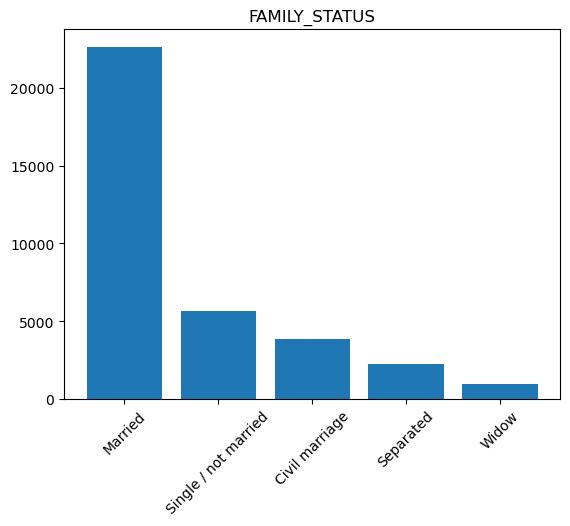

In [113]:
fam_st = df_cleaned_no_outlier['NAME_FAMILY_STATUS'].value_counts()
plt.bar(fam_st.index, fam_st.values)
plt.xticks(rotation=45)
plt.title('FAMILY_STATUS')
plt.show()

##### Lot of married people have taken loans

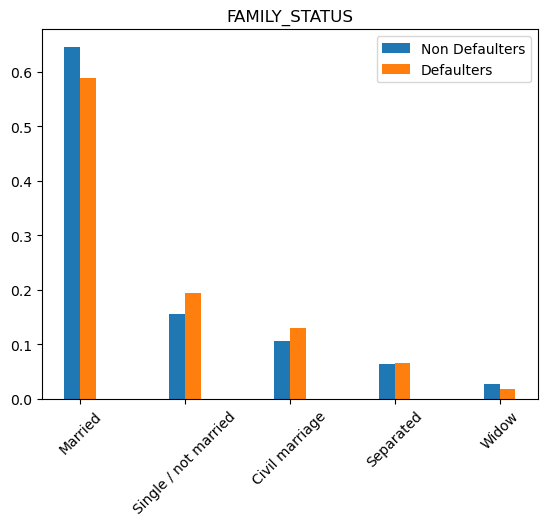

In [114]:
fam_st_nondef = df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET']==0]['NAME_FAMILY_STATUS'].value_counts(normalize=True)
fam_st_def = df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET']==1]['NAME_FAMILY_STATUS'].value_counts(normalize=True)
x = np.arange(len(fam_st_nondef.index))

plt.bar(x, fam_st_nondef.values,  width = 0.15, label = 'Non Defaulters')
plt.bar(x+0.15, fam_st_def.values,  width = 0.15, label = 'Defaulters')
plt.xticks(rotation=45)
plt.title('FAMILY_STATUS')
plt.xticks(ticks = x+0.15/2,labels = fam_st_def.index)
plt.legend()
plt.show()

##### People who are single/not married and civil marriage have high defaulters rate

#### EDUCATION TYPE

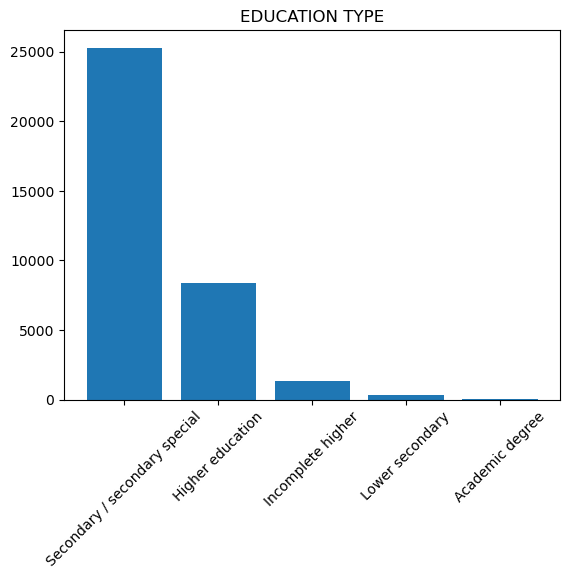

In [115]:
edu_type = df_cleaned_no_outlier['NAME_EDUCATION_TYPE'].value_counts()
plt.bar(edu_type.index, edu_type.values)
plt.xticks(rotation=45)
plt.title('EDUCATION TYPE')
plt.show()

##### Highest number of loans are taken by the people who have completed Secondary/ Scondary Special education

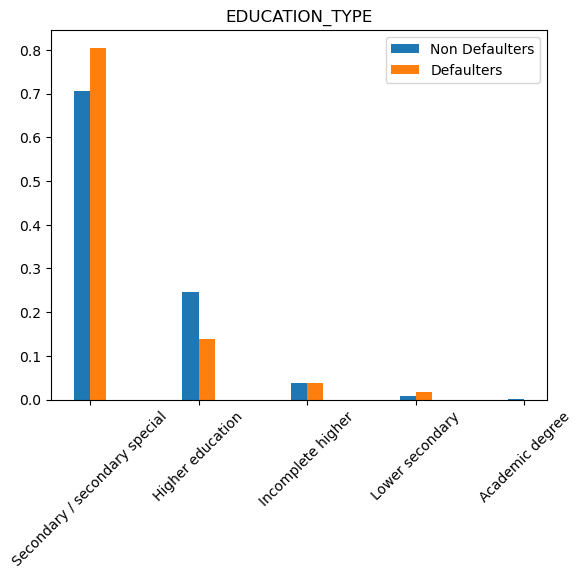

In [116]:
ed_nondef = df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET']==0]['NAME_EDUCATION_TYPE'].value_counts(normalize=True)
ed_def = df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET']==1]['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

x = np.arange(len(ed_nondef.index))
y = np.arange(len(ed_def.index))
plt.bar(x, ed_nondef.values,  width = 0.15, label = 'Non Defaulters')
plt.bar(y+0.15, ed_def.values,  width = 0.15, label = 'Defaulters')

plt.title('EDUCATION_TYPE')
plt.xticks(ticks = x+0.15/2,labels = ed_nondef.index, rotation =45)
plt.legend()
plt.show()


##### People who are pursuing Secondary education have high defaulters and people who are pursuing Higher Secondary have lowest defaulters 


#### OCCUPATION TYPE

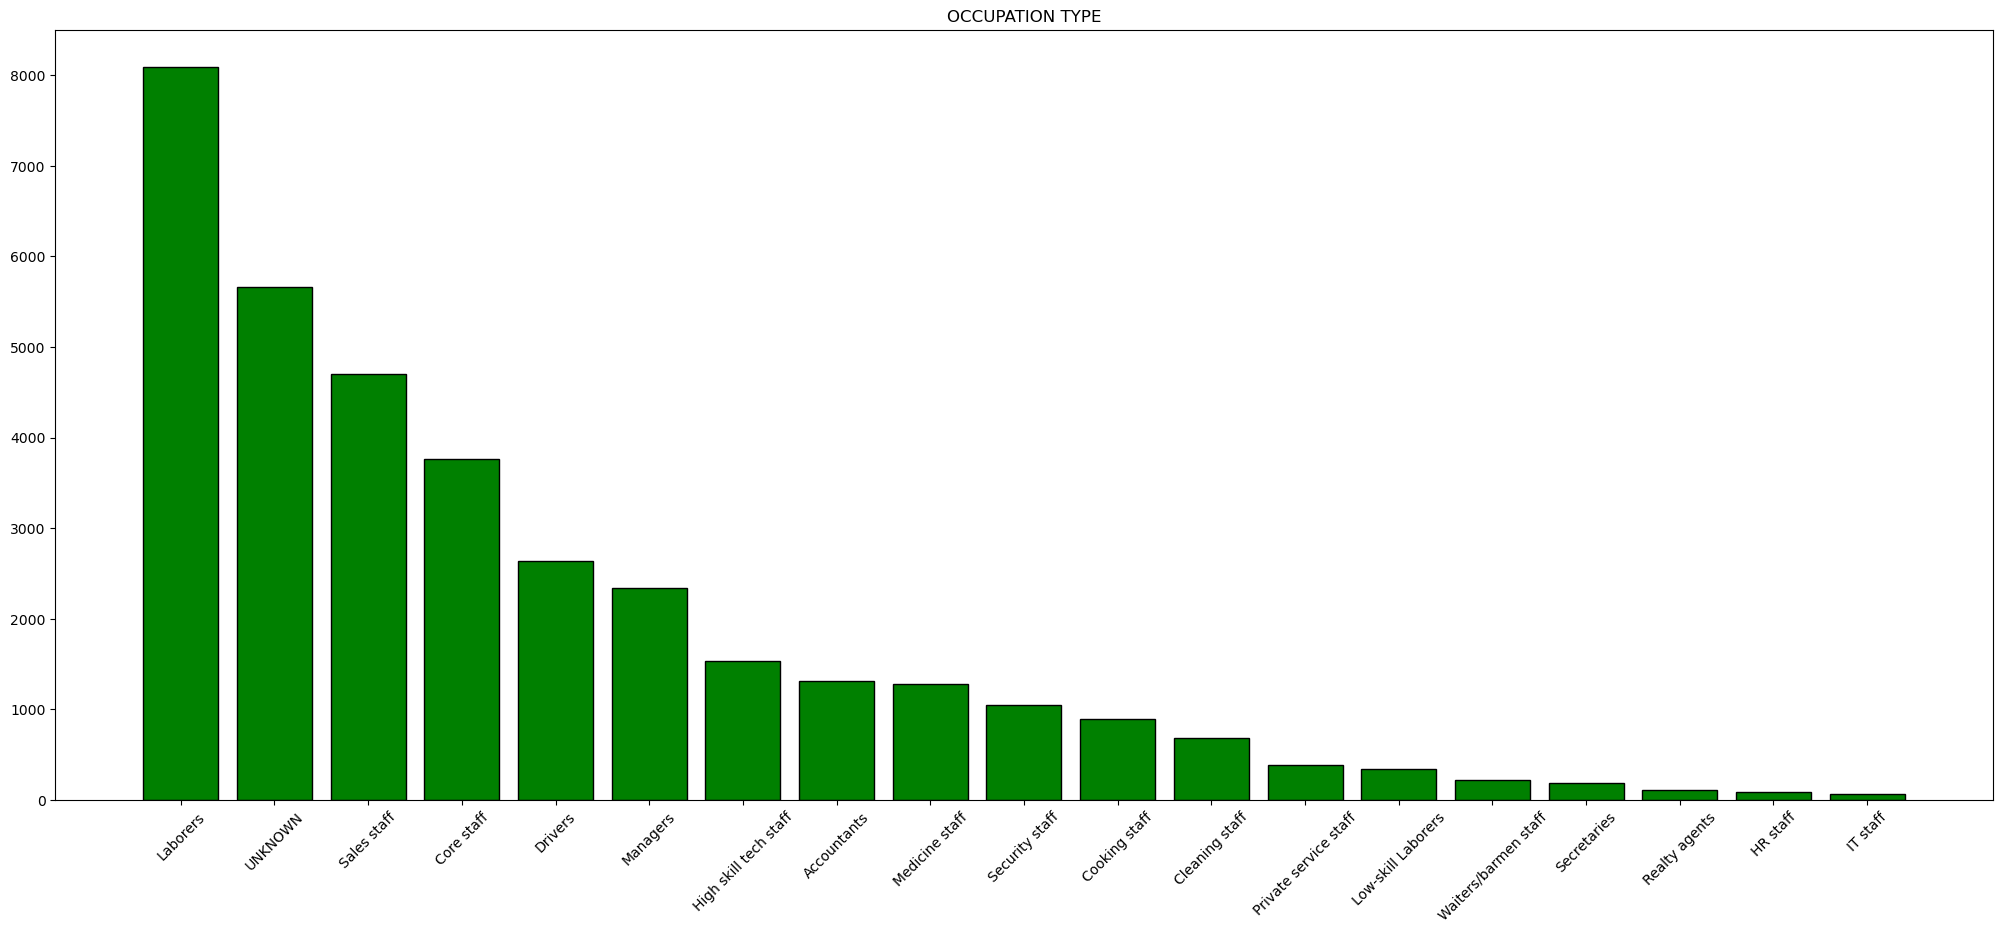

In [117]:
occ = df_cleaned_no_outlier['OCCUPATION_TYPE'].value_counts()
plt.figure(figsize = (25,10))
plt.bar(occ.index, occ.values, color = 'green', edgecolor = 'black')
plt.xticks(rotation=45)
plt.title('OCCUPATION TYPE')
plt.show()

#### Highest number of people who have applied for loan are laborers

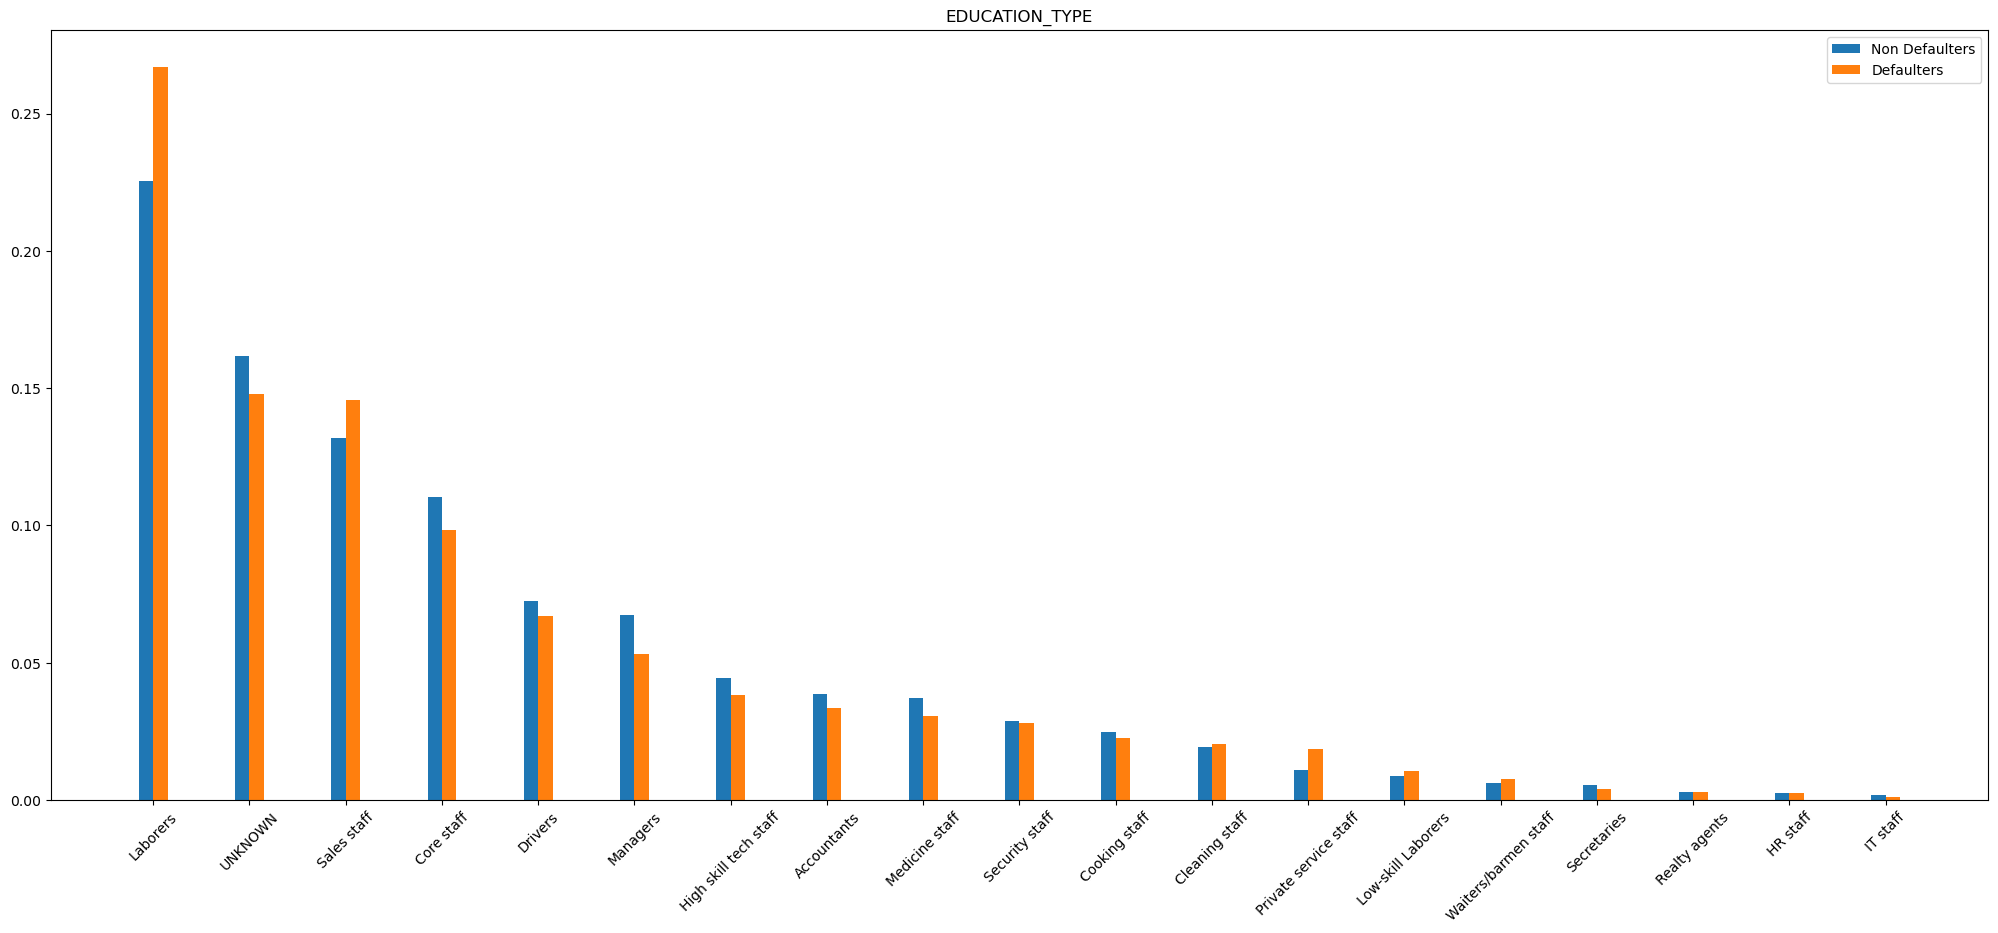

In [118]:
occ_nondef = df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET']==0]['OCCUPATION_TYPE'].value_counts(normalize=True)
occ_def = df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET']==1]['OCCUPATION_TYPE'].value_counts(normalize=True)
plt.figure(figsize=(25,10))
x = np.arange(len(occ_nondef.index))
y = np.arange(len(occ_def.index))
plt.bar(x, occ_nondef.values,  width = 0.15, label = 'Non Defaulters')
plt.bar(y+0.15, occ_def.values,  width = 0.15, label = 'Defaulters')

plt.title('EDUCATION_TYPE')
plt.xticks(ticks = x+0.15/2,labels = occ_nondef.index, rotation =45)
plt.legend()
plt.show()

##### Highest number of defaulters are laborers and the lowest number of defaulters are IT Staff, HR Staff, Core Staff, Manager etc

####  YEARS OF EMPLOYMENT

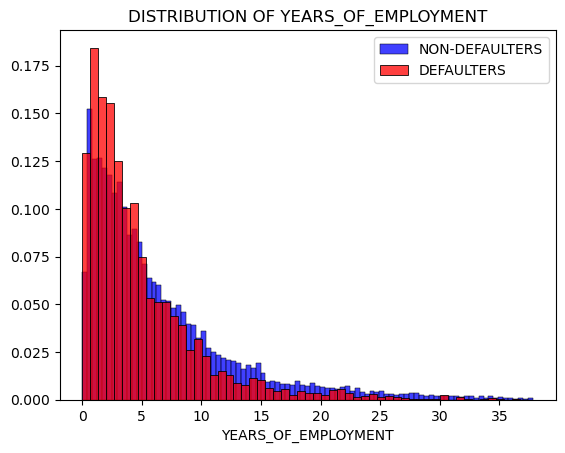

In [119]:
sns.histplot(df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET'] == 0]['YEARS_OF_EMPLOYMENT'],
             stat='density', color='blue', label='NON-DEFAULTERS')

sns.histplot(df_cleaned_no_outlier[df_cleaned_no_outlier['TARGET'] == 1]['YEARS_OF_EMPLOYMENT'],
             stat='density', color='red', label='DEFAULTERS')

plt.legend()
plt.title('DISTRIBUTION OF YEARS_OF_EMPLOYMENT')
plt.xlabel('YEARS_OF_EMPLOYMENT')
plt.ylabel('')
plt.show()


##### As the years of experience increases, the defaulters rate decreases
##### The people who have 0-5 years of experience have the highest number of defaulters. 
##### As the years of experience increases, the defaulters rate decreases


#### correlation

In [151]:


df_numeric = df_cleaned_no_outlier.select_dtypes(include='number')
df_numeric.drop(columns=['SK_ID_CURR','TARGET'], inplace=True)

norm_df.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_OF_EMPLOYMENT,YEARS_OF_REGISTRATION,YEARS_OF_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.039290,0.012973,0.008724,0.007091,-0.027025,-0.170120,-0.007987,-0.128714,0.095729,...,0.012768,-0.017714,-0.012523,NaN,-0.006691,-0.032261,-0.027173,-0.006327,-0.001774,-0.021476
AMT_INCOME_TOTAL,-0.039290,1.000000,0.297167,0.365453,0.297672,0.047463,0.079457,-0.007366,0.003858,0.038619,...,-0.033196,-0.011629,0.001977,NaN,-0.008738,-0.011140,0.032956,0.102995,0.032848,0.070296
AMT_CREDIT,0.012973,0.297167,1.000000,0.738244,0.977140,0.019405,0.181375,0.108525,0.052675,0.047519,...,0.021139,-0.007450,0.027876,NaN,0.007835,-0.025687,0.011607,0.075108,-0.013353,0.018665
AMT_ANNUITY,0.008724,0.365453,0.738244,1.000000,0.737542,0.009115,0.065322,0.049595,-0.015139,0.038058,...,-0.037068,-0.017314,0.000116,NaN,0.012551,-0.018220,0.055918,0.065108,-0.003609,0.024072
AMT_GOODS_PRICE,0.007091,0.297672,0.977140,0.737542,1.000000,0.032234,0.173621,0.117956,0.052487,0.055860,...,0.018878,-0.007444,0.036234,NaN,0.003759,-0.026678,0.013122,0.073129,-0.015146,0.010490
REGION_POPULATION_RELATIVE,-0.027025,0.047463,0.019405,0.009115,0.032234,1.000000,0.019208,-0.000082,0.021215,0.007860,...,0.059191,-0.010467,0.031134,NaN,0.005744,0.005073,-0.000774,0.069351,0.044654,0.036060
AGE,-0.170120,0.079457,0.181375,0.065322,0.173621,0.019208,1.000000,0.309215,0.239419,0.128907,...,-0.051188,0.010212,0.002518,NaN,-0.030722,0.000663,-0.009056,0.034440,-0.006920,0.108631
YEARS_OF_EMPLOYMENT,-0.007987,-0.007366,0.108525,0.049595,0.117956,-0.000082,0.309215,1.000000,0.147955,0.111747,...,-0.045014,-0.001299,0.005092,NaN,-0.030144,-0.000315,-0.005315,0.023614,-0.011326,0.019648
YEARS_OF_REGISTRATION,-0.128714,0.003858,0.052675,-0.015139,0.052487,0.021215,0.239419,0.147955,1.000000,0.044515,...,-0.028585,0.015922,-0.011638,NaN,-0.015066,-0.008955,0.001577,0.009771,0.014993,0.020631
YEARS_OF_ID_PUBLISH,0.095729,0.038619,0.047519,0.038058,0.055860,0.007860,0.128907,0.111747,0.044515,1.000000,...,0.005180,0.010550,0.027952,NaN,-0.025961,0.009172,-0.040968,0.044419,0.031388,0.089845


#### AMOUNT GOODS PRICE

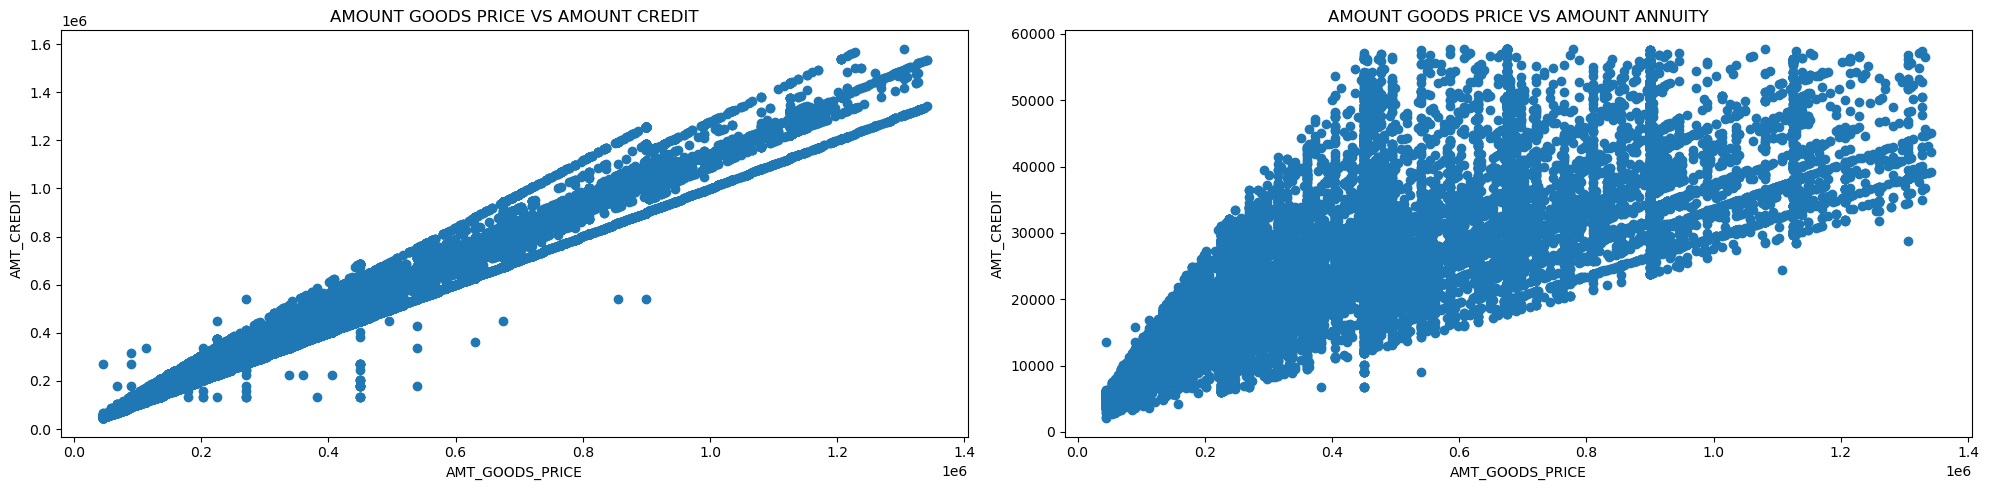

In [152]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)

plt.scatter(df_cleaned_no_outlier['AMT_GOODS_PRICE'], df_cleaned_no_outlier['AMT_CREDIT'])
plt.title('AMOUNT GOODS PRICE VS AMOUNT CREDIT')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.subplot(1, 2, 2)
plt.scatter(df_cleaned_no_outlier['AMT_GOODS_PRICE'], df_cleaned_no_outlier['AMT_ANNUITY'])
plt.title('AMOUNT GOODS PRICE VS AMOUNT ANNUITY')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.tight_layout()
plt.show()

##### As the Amount Goods Price increases, Amount Credit and Amount Annuity increases

#### DEFAULTERS

In [150]:

df_numeric = df_cleaned_no_outlier.select_dtypes(include='number')
df_numeric = df_numeric[df_numeric['TARGET']==1]
df_numeric.drop(columns=['SK_ID_CURR','TARGET'], inplace=True)

df_numeric.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_OF_EMPLOYMENT,YEARS_OF_REGISTRATION,YEARS_OF_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.039290,0.012973,0.008724,0.007091,-0.027025,-0.170120,-0.007987,-0.128714,0.095729,...,0.012768,-0.017714,-0.012523,NaN,-0.006691,-0.032261,-0.027173,-0.006327,-0.001774,-0.021476
AMT_INCOME_TOTAL,-0.039290,1.000000,0.297167,0.365453,0.297672,0.047463,0.079457,-0.007366,0.003858,0.038619,...,-0.033196,-0.011629,0.001977,NaN,-0.008738,-0.011140,0.032956,0.102995,0.032848,0.070296
AMT_CREDIT,0.012973,0.297167,1.000000,0.738244,0.977140,0.019405,0.181375,0.108525,0.052675,0.047519,...,0.021139,-0.007450,0.027876,NaN,0.007835,-0.025687,0.011607,0.075108,-0.013353,0.018665
AMT_ANNUITY,0.008724,0.365453,0.738244,1.000000,0.737542,0.009115,0.065322,0.049595,-0.015139,0.038058,...,-0.037068,-0.017314,0.000116,NaN,0.012551,-0.018220,0.055918,0.065108,-0.003609,0.024072
AMT_GOODS_PRICE,0.007091,0.297672,0.977140,0.737542,1.000000,0.032234,0.173621,0.117956,0.052487,0.055860,...,0.018878,-0.007444,0.036234,NaN,0.003759,-0.026678,0.013122,0.073129,-0.015146,0.010490
REGION_POPULATION_RELATIVE,-0.027025,0.047463,0.019405,0.009115,0.032234,1.000000,0.019208,-0.000082,0.021215,0.007860,...,0.059191,-0.010467,0.031134,NaN,0.005744,0.005073,-0.000774,0.069351,0.044654,0.036060
AGE,-0.170120,0.079457,0.181375,0.065322,0.173621,0.019208,1.000000,0.309215,0.239419,0.128907,...,-0.051188,0.010212,0.002518,NaN,-0.030722,0.000663,-0.009056,0.034440,-0.006920,0.108631
YEARS_OF_EMPLOYMENT,-0.007987,-0.007366,0.108525,0.049595,0.117956,-0.000082,0.309215,1.000000,0.147955,0.111747,...,-0.045014,-0.001299,0.005092,NaN,-0.030144,-0.000315,-0.005315,0.023614,-0.011326,0.019648
YEARS_OF_REGISTRATION,-0.128714,0.003858,0.052675,-0.015139,0.052487,0.021215,0.239419,0.147955,1.000000,0.044515,...,-0.028585,0.015922,-0.011638,NaN,-0.015066,-0.008955,0.001577,0.009771,0.014993,0.020631
YEARS_OF_ID_PUBLISH,0.095729,0.038619,0.047519,0.038058,0.055860,0.007860,0.128907,0.111747,0.044515,1.000000,...,0.005180,0.010550,0.027952,NaN,-0.025961,0.009172,-0.040968,0.044419,0.031388,0.089845


#### INSIGHTS 
#### The insights gained from the project will help the bank to provide loan for the right people
#### •	As the age and experience increases, the defaulters rate decreases. So, the bank should give priority to the older clients.
#### •	Female clients are more likely than Male to default.
#### •	Family members and count of Children does not related with defaulters. 
#### •	Married people take the highest number of loans but the single/ not married people are the people with highest default.
#### •	As the income increases, the number of people who have taken loan decreases. But higher income does not directly leads to lower default      proportion
#### •  While most loans are concentrated around mid-level credit amounts (300k–600k), the proportion of defaulters appears to decline as credit amount increases. This suggests that applicants approved for higher credit amounts are generally more reliable or have stronger profiles, resulting in fewer defaults
#### •  As the annuity amount increases, the number of people who have taken loan rate decreases. The defaulters are there across all ranges
#### •	Corporate clients are safer compared to labor class clients.
#### •  People who are pursuing Secondary education have high defaulters and people who are pursuing Higher Secondary have lowest defaulters



#### RESULT
#### This project involved extensive use of Pandas, Numpy, Matplotlib and Seaborn. The dataset was very huge and it involves lot of missing data and outliers, handling them was a task and this project helped me understand how to handle null values and also helped me to understand data analyze
